# < My Linear Regression Project >

### Import Packages & Data

In [1]:
import sklearn.datasets 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure

plt.rc("figure", figsize=(10,5))


In [2]:
IDMB_movies = pd.read_csv("C:\\Users\\LAKHAN YADAV\\Downloads\\IMDB-Movie-Data.csv")
IDMB_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,Sci-Fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,Mystery,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,Horror,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,Animation,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,Action,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
# x - independence feature, y - dependence feature
IDMB_movies.columns
x = IDMB_movies[['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes',
       'Metascore']]
y = IDMB_movies['Revenue (Millions)']

### Data cleaning

In [4]:
# check if null value contains by any columns
print(IDMB_movies.isnull().sum(axis=0))

# Here revenue and metascore has an null value
"""null_col = ["Revenue (Millions)", "Metascore"]

for i in null_col:
    IDMB_movies.loc[IDMB_movies.loc[:,i].isnull(), i] = IDMB_movies.loc[:,i].mean """

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


'null_col = ["Revenue (Millions)", "Metascore"]\n\nfor i in null_col:\n    IDMB_movies.loc[IDMB_movies.loc[:,i].isnull(), i] = IDMB_movies.loc[:,i].mean '

In [5]:
# treat outlier
list_col = ['Rank', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore']

"""for i in list_col:
    per_90 = np.percentile(IDMB_movies[i], 90)
    per_10 = np.percentile(IDMB_movies[i], 10)
    IDMB_movies[i] =  np.where(IDMB_movies[i]>per_90, per_90, IDMB_movies[i])
    IDMB_movies[i] =  np.where(IDMB_movies[i]<per_10, per_10, IDMB_movies[i])"""

'for i in list_col:\n    per_90 = np.percentile(IDMB_movies[i], 90)\n    per_10 = np.percentile(IDMB_movies[i], 10)\n    IDMB_movies[i] =  np.where(IDMB_movies[i]>per_90, per_90, IDMB_movies[i])\n    IDMB_movies[i] =  np.where(IDMB_movies[i]<per_10, per_10, IDMB_movies[i])'

### EDA

In [6]:
# Data exploration - computation, graph plot
print(IDMB_movies.head())
IDMB_movies.describe()

   Rank                    Title      Genre  \
0     1  Guardians of the Galaxy     Sci-Fi   
1     2               Prometheus    Mystery   
2     3                    Split     Horror   
3     4                     Sing  Animation   
4     5            Suicide Squad     Action   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  Ja

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,50.00000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000
mean,25.50000,2015.540000,117.100000,6.872000,1.705165e+05,130.699333,54.973333
std,14.57738,1.567658,19.195291,1.140541,2.105029e+05,124.553651,25.687185
min,1.00000,2007.000000,73.000000,2.700000,2.220000e+02,-45.840000,-40.000000
25%,13.25000,2016.000000,107.250000,6.325000,2.354800e+04,32.170000,42.750000
50%,25.50000,2016.000000,116.000000,7.050000,1.192050e+05,101.820000,61.500000
75%,37.75000,2016.000000,129.500000,7.675000,2.269940e+05,167.492500,71.000000
max,50.00000,2016.000000,169.000000,8.600000,1.047747e+06,532.170000,96.000000


<Axes: xlabel='Genre', ylabel='Revenue (Millions)'>

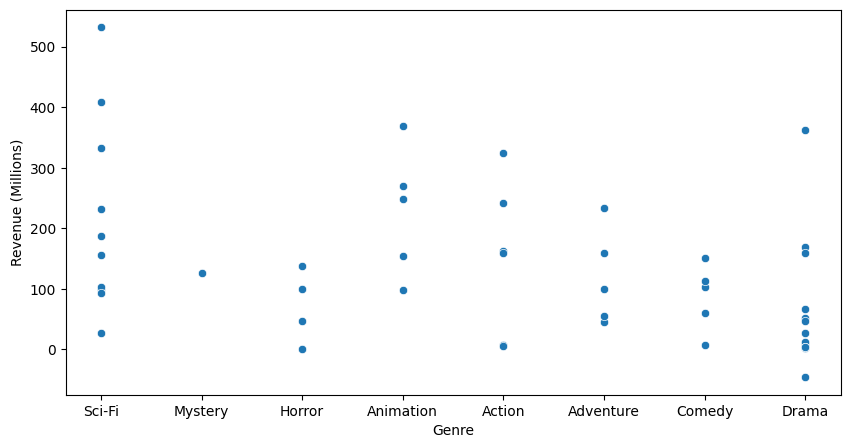

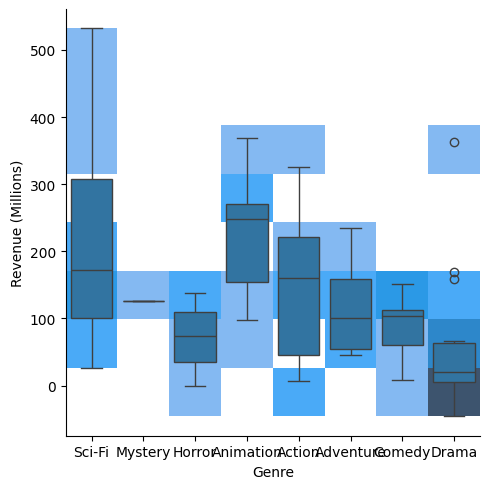

In [7]:
# Here we compare on Genre and their Revenues
sns.scatterplot(x="Genre",y="Revenue (Millions)", data=IDMB_movies)
sns.displot(x="Genre",y="Revenue (Millions)", data=IDMB_movies)
sns.boxplot(x="Genre",y="Revenue (Millions)", data=IDMB_movies)

<Axes: xlabel='Genre', ylabel='Year'>

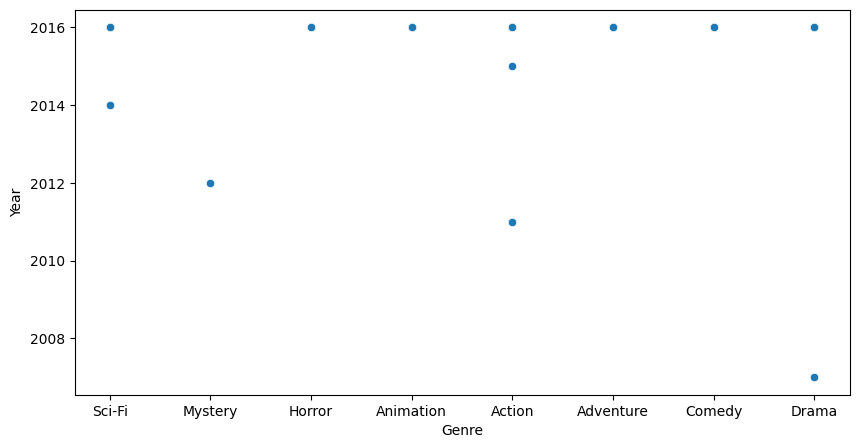

In [8]:
sns.scatterplot(x="Genre",y="Year", data=IDMB_movies)   # chart b/w Genre and Year

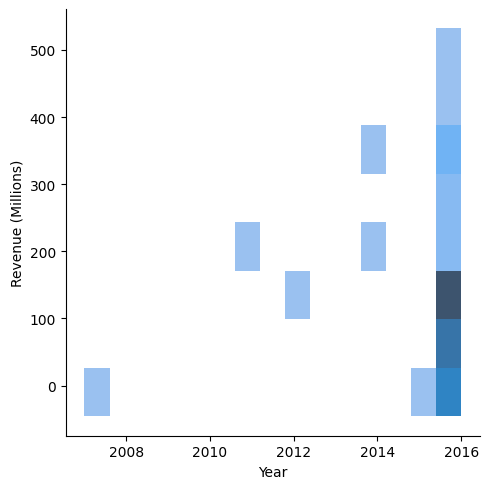

In [9]:
sns.displot(x="Year",y="Revenue (Millions)", data=IDMB_movies)   # chart b/w Year and Revenues

'--> Based on this charts we can see that sci-fy movies has great craz especially starts after year 2016'

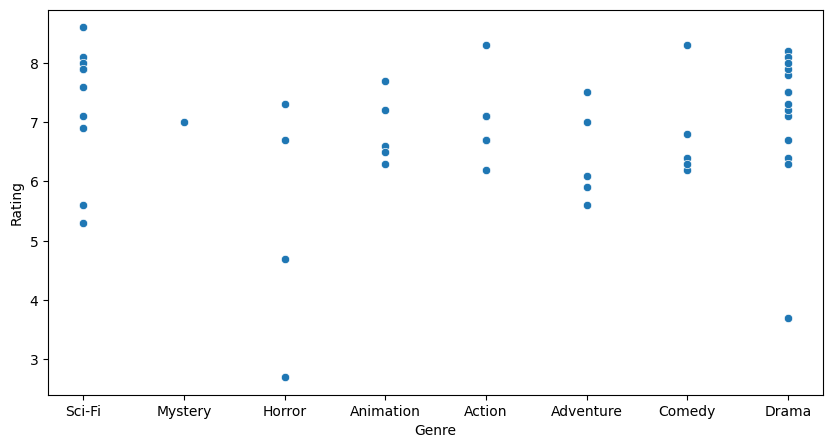

In [10]:
sns.scatterplot(x="Genre",y="Rating", data=IDMB_movies)
"""--> Based on this charts we can see that sci-fy movies has great craz especially starts after year 2016"""
# Top 5 best movies genre type = [sci-fy, action, adventure, animation, drama]

### Feature Engineering

In [11]:
# Feature Engineering - Adding new features based on analyse
IDMB_movies["Top movies Genre"] = IDMB_movies.apply(lambda x:"📈" if (x["Genre"]=="Sci-Fi" or x["Genre"]=="Animation" 
or x["Genre"]=="Action" or x["Genre"]=="Adventure" or x["Genre"]=="Drama") else "---", axis=1)

IDMB_movies["Movie Evaluation-Year"] = IDMB_movies.apply(lambda x:"😲" if(x["Year"]==2016 or x["Year"]==2015 or x["Year"]==2014) else "---",axis=1)
IDMB_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Top movies Genre,Movie Evaluation-Year
0,1,Guardians of the Galaxy,Sci-Fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,📈,😲
1,2,Prometheus,Mystery,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,---,---
2,3,Split,Horror,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,---,😲
3,4,Sing,Animation,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,📈,😲
4,5,Suicide Squad,Action,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,📈,😲


### Model Training & Noramalised

In [12]:
# Model training using train_test_split method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [13]:
x_train
x_tr = x_train[['Rank',  'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Metascore']]
x_tr

,Rank,Year,Runtime (Minutes),Rating,Votes,Metascore
6,7,2016,128,8.3,258682,93.000000
41,42,2016,111,7.5,135095,26.666667
46,47,2016,132,7.3,17818,64.000000
47,48,2016,91,5.6,5103,83.000000
15,16,2016,87,6.6,120259,61.000000
9,10,2016,116,7.0,192177,41.000000
16,17,2016,139,8.2,211760,71.000000
24,25,2016,120,5.3,127553,32.000000
34,35,2016,107,5.6,46165,49.000000
31,32,2016,116,7.5,126030,67.000000


In [14]:
x_test
x_t = x_test[['Rank',  'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Metascore']]
x_t

,Rank,Year,Runtime (Minutes),Rating,Votes,Metascore
13,14,2016,107,7.7,118151,81.000000
39,40,2007,113,7.1,241,46.666667
30,31,2016,111,6.3,48123,39.000000
45,46,2011,136,6.7,395025,45.000000
17,18,2016,123,6.7,150823,58.000000
48,49,2016,122,7.1,164567,68.000000
26,27,2015,159,8.3,76193,-16.000000
25,26,2016,83,6.8,222,8.000000
32,33,2016,144,7.1,275510,52.000000
19,20,2016,116,8.0,340798,81.000000


In [15]:
## standardizing the data set for make model more accurate... --> normalise the data (imp.)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_t = scaler.transform(x_t)
print(x_tr)   ## Normalised

[[-1.28644117  0.28718326  0.6878738   1.23157597  0.3927354   1.46560854]
 [ 1.1121744   0.28718326 -0.20381446  0.60115317 -0.14214838 -1.18649941]
 [ 1.45483377  0.28718326  0.89768281  0.44354747 -0.64972252  0.30614426]
 [ 1.52336564  0.28718326 -1.25285948 -0.89610098 -0.70475296  1.06579327]
 [-0.66965431  0.28718326 -1.46266848 -0.10807248 -0.2063585   0.18619968]
 [-1.08084555  0.28718326  0.05844679  0.20713892  0.10490216 -0.61343085]
 [-0.60112243  0.28718326  1.26484856  1.15277312  0.18965727  0.58601495]
 [-0.05286745  0.28718326  0.2682558  -1.13250953 -0.17479011 -0.9732646 ]
 [ 0.63245129  0.28718326 -0.41362346 -0.89610098 -0.52703688 -0.29357864]
 [ 0.42685567  0.28718326  0.05844679  0.60115317 -0.18138165  0.42608884]
 [-1.69763241 -2.22567029  0.32070805  1.07397027  2.54977292  0.78592258]
 [ 1.31777002  0.28718326 -0.83324147 -0.34448103 -0.72563121  0.02627357]
 [ 0.15272817  0.28718326 -0.83324147 -1.60532663 -0.72457518 -3.85193453]
 [ 0.56391942  0.28718326

In [16]:
x_t      ## Normalised

array([[-8.06718052e-01,  2.87183263e-01, -4.13623464e-01,
         7.58758871e-01, -2.15481912e-01,  9.85830218e-01],
       [ 9.75110655e-01, -1.10206577e+01, -9.89099587e-02,
         2.85941770e-01, -7.25795671e-01, -3.86868869e-01],
       [ 3.58323795e-01,  2.87183263e-01, -2.03814460e-01,
        -3.44481030e-01, -5.18562668e-01, -6.93393908e-01],
       [ 1.38630190e+00, -5.99495062e+00,  1.10749181e+00,
        -2.92696300e-02,  9.82827066e-01, -4.53504747e-01],
       [-5.32590559e-01,  2.87183263e-01,  4.25612550e-01,
        -2.92696300e-02, -7.40776960e-02,  6.62551016e-02],
       [ 1.59189752e+00,  2.87183263e-01,  3.73160299e-01,
         2.85941770e-01, -1.45937481e-02,  4.66070370e-01],
       [ 8.41963016e-02, -9.69243514e-01,  2.31389358e+00,
         1.23157597e+00, -3.97075879e-01, -2.89237788e+00],
       [ 1.56644282e-02,  2.87183263e-01, -1.67247748e+00,
         4.95332201e-02, -7.25877903e-01, -1.93282124e+00],
       [ 4.95387542e-01,  2.87183263e-01,  1.527

In [17]:
##scaler.inverse_transform(x_t)

## cross validation ## we can also use fit method ---> regression.fit(x_tr, y_train)...
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(x_tr,y_train)     # model trained

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Cross validate & Predict

In [18]:
mse = cross_val_score(regression,x_tr, y_train, scoring="neg_mean_squared_error",cv=7)   ## Here we cross validate (cv) 7 times --> mean squared error (mse)
mse

array([-14487.51497652,  -3415.27705722,  -3186.64403808, -31131.71311313,
       -13558.11235768, -10404.24472114, -12033.77447998])

In [19]:
np.mean(mse)   ## Its mean of mean sq error --> too minimal (-ve) - too accurate

np.float64(-12602.468677678238)

In [20]:
##Evaluation --> prediction  
reg_pred = regression.predict(x_tr)
reg_pred

array([1.76730238e+02, 3.26089986e+01, 1.04386090e+00, 1.16176558e+02,
       1.52637641e+02, 1.28137471e+02, 1.05604090e+02, 1.20321057e+02,
       9.20413074e+01, 8.62296813e+01, 3.05680354e+02, 5.18385026e+01,
       4.46995583e-02, 3.29726140e+02, 1.07467708e+02, 9.69376300e+01,
       7.96510222e+01, 3.47484961e+02, 6.04373427e+01, 1.04663220e+02,
       1.34160970e+02, 3.70540390e+01, 1.94320092e+02, 9.37835066e+01,
       1.01724878e+02, 1.45954368e+02, 7.37228858e+01, 6.87088939e+01,
       5.11990761e+01, 4.35953059e+01, 1.18880286e+02, 1.49978117e+02,
       9.31087933e+01, 1.09969333e+02, 6.45136394e+01])

In [21]:
## checks data set --> sns.displot(reg_pred-y_test, kind="kde")
#r2_score(y_test, reg_pred)   ## predict the model how accurate is -->
print(y_test.shape, reg_pred.shape)

reg_15 = reg_pred[:15]
print(r2_score(y_test, reg_15))

reg_20 = reg_pred[5:20]
print(r2_score(y_test, reg_20))

reg_30 = reg_pred[15:30]
print(r2_score(y_test, reg_30))

overall_pred = [-0.17935256194235705,-0.4145466392449886,-0.5354597672608743]

np.mean(overall_pred)       ### So finally this project is around 35% accurate 😅😅

(15,) (35,)
-0.17935256194235705
-0.4145466392449886
-0.5354597672608743


np.float64(-0.37645298948274)

In [22]:
def overall_pred(n):
    n = 1
    pred = []
    while n<20:
        reg_n = reg_pred[n:n+15]
        n+=1
        print(r2_score(y_test, reg_n))
        pred.append(r2_score(y_test, reg_n))
    return np.mean(pred)
n = True
overall_pred(n)     ### now its 55% accurate 🤣🤣

-0.6886707347304402
-0.6214939746108603
0.09814175908312828
-1.15496122340241
-0.4145466392449886
-0.39732852169758104
-0.2490744240878151
-0.8489532429665081
-1.019797210776216
-0.27188077647749864
-0.8870582938806797
-0.7171942840675023
-0.42310454096489436
-0.2655464483140073
-0.5354597672608743
-0.9580586586466038
-0.36565624003458264
-0.670553008167107
-0.37559220284598926


np.float64(-0.5666730754259701)

In [23]:
"""Done"""

'Done'